In [3]:
import numpy as np
from math import sin, cos, sqrt

def deriv_send(xdot, x):
    rho=25
    sigma=10
    beta=1.5
    xdot[0]=sigma * (x[1] - x[0])
    xdot[1]=x[0] * rho - x[1] - x[0] * x[2]
    xdot[2]=x[0] * x[1] - beta * x[2]
    return 0

def deriv_receive(xdot, x, xp):
    rho=25
    sigma=10
    beta=1.5
    xdot[0]=sigma * (x[1] - x[0])
    xdot[1]=xp * rho - x[1] - xp * x[2]
    xdot[2]=xp * x[1] - beta * x[2]
    return 0

def rkm_send(h, x, N):
    xdot0 = np.zeros(N, dtype=np.float64)
    xdot1 = np.zeros(N, dtype=np.float64)
    xdot2 = np.zeros(N, dtype=np.float64)
    xdot3 = np.zeros(N, dtype=np.float64)
    g = np.zeros(N, dtype=np.float64)
    
    hh = h * 0.5
    deriv_send(xdot0, x)
    for i in range(N):
        g[i] = x[i] + hh * xdot0[i]
        
    deriv_send(xdot1, g)
    for i in range(N):
        g[i] = x[i] + hh * xdot1[i]
        
    deriv_send(xdot2, g)
    for i in range(N):
        g[i] = x[i] + h * xdot2[i]
        
    deriv_send(xdot3, g)
    for i in range(N):
        x[i] = x[i] + h * (xdot0[i] + 2.0 * 
                           (xdot1[i] + xdot2[i]) + 
                           xdot3[i]) / 6.0
    return 0

def rkm_receive(h, x, xp, N):
    xdot0 = np.zeros(N, dtype=np.float64)
    xdot1 = np.zeros(N, dtype=np.float64)
    xdot2 = np.zeros(N, dtype=np.float64)
    xdot3 = np.zeros(N, dtype=np.float64)
    g = np.zeros(N, dtype=np.float64)
    
    hh = h * 0.5
    deriv_receive(xdot0, x, xp)
    for i in range(N):
        g[i] = x[i] + hh * xdot0[i]
    
    deriv_receive(xdot1, g, xp)
    for i in range(N):
        g[i] = x[i] + hh * xdot1[i]
        
    deriv_receive(xdot2, g, xp)
    for i in range(N):
        g[i] = x[i] + h * xdot2[i]
        
    deriv_receive(xdot3, g, xp)
    for i in range(N):
        x[i] = x[i] + h * (xdot0[i] + 2.0 * 
                           (xdot1[i] + xdot2[i]) + 
                           xdot3[i]) / 6.0
        
    return 0


def chaos_commn(N = 3 , nosdata = 40000):
    xt = np.zeros(nosdata, dtype=np.float64)
    xr = np.zeros(nosdata, dtype=np.float64)
    signal = np.zeros(nosdata, dtype=np.float64)
    recovered = np.zeros(nosdata, dtype=np.float64)
    encryptedx = np.zeros(nosdata, dtype=np.float64)
        
    tstep = 0.0001
    ndrop = 15000
    xold = np.random.uniform(0, 1, size=N)
    print xold
    
    for i in range(ndrop):
        rkm_send(tstep, xold, N)
        
    for i in range(nosdata):
        rkm_send(tstep, xold, N)
        xt[i] = xold[0]
        
    #signal = np.random.uniform(-1, 1, size=nosdata)
    for i in range(nosdata):
        signal[i] = (1.5 * sin(0.01 * i) + 
                     1.0 * sin(0.01 * sqrt(2.0) * i))
        
    for i in range(nosdata):
        encryptedx[i] =  signal[i] + xt[i]
    
    
    xold = np.random.uniform(0, 1, size=N)
    print xold
    for i in range(ndrop):
        rkm_send(tstep, xold, N)
        
    for i in range(nosdata):
        rkm_receive(tstep, xold, encryptedx[i], N)
        xr[i] = xold[0]
        
    for i in range(nosdata):
        recovered[i] = encryptedx[i] - xr[i]
        
    return (signal, encryptedx, recovered, xt, xr)

In [4]:
signal, encryptedx, recovered, xt, xr = chaos_commn()
print signal
print encryptedx
print recovered

[ 0.56679685  0.86009551  0.16295162]
[ 0.96923438  0.46133207  0.36220055]
[ 0.          0.02914141  0.0582785  ..., -1.0964849  -1.09072724
 -1.08487748]
[-9.96990268 -9.94221172 -9.91452149 ...,  3.76555221  3.77436287
  3.78326745]
[ 0.03312767  0.06188108  0.09062996 ..., -1.11507054 -1.10930866
 -1.10345341]


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


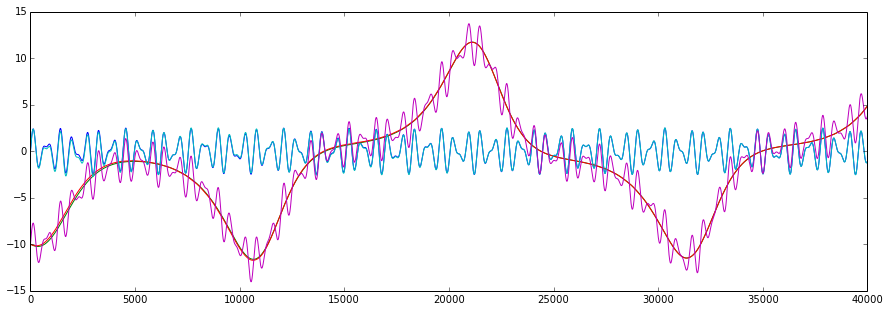

In [5]:
%pylab inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
x = range(len(signal))

plt.figure(figsize=(15, 5))
#fft = np.fft(encryptedx)

plt.plot(x,signal)
plt.plot(x,xt)
plt.plot(x,xr)
plt.plot(x,recovered)
plt.plot(x,encryptedx)
plt.show()

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

plt.figure()
plt.plot( freq, np.abs(np.fft.fft(xt)))
plt.figure()
plt.plot( freq, np.abs(np.fft.fft(signal)))
plt.figure()
plt.plot( freq, np.abs(np.fft.fft(encryptedx)))
#plt.plot(freq, np.angle(Y) )
plt.show()

NameError: name 'freq' is not defined

Populating the interactive namespace from numpy and matplotlib


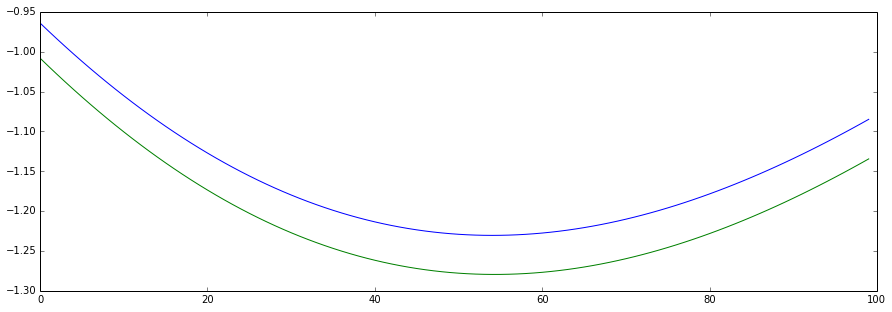

In [9]:
%pylab inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
s = signal[-100:]
r = recovered[-100:]
x = range(len(s))

plt.figure(figsize=(15, 5))

plt.plot(x,s)
plt.plot(x,r)
plt.show()

In [5]:
def filter(encrypted, a): #dt, RC, N):    
    N = len(encrypted)
    y = np.zeros(N, dtype=np.float64)
    #a = 0.1 #RC / (RC + dt)
    y[0] = x[0]
    for i in range(1,N):
        y[i] = a * (y[i-1] + encrypted[i] - encrypted[i-1])
    return y

Populating the interactive namespace from numpy and matplotlib


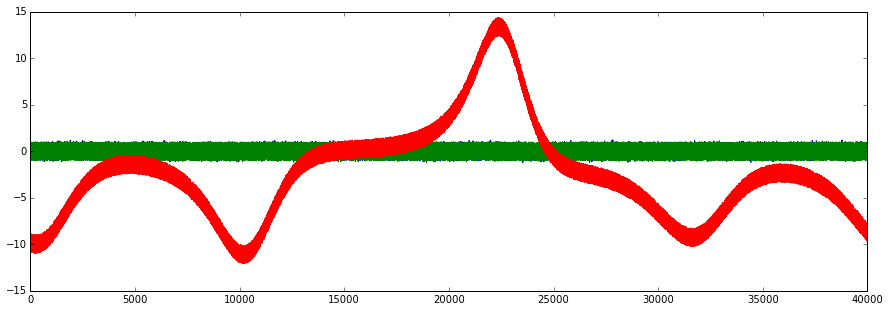

In [6]:
%pylab inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
x = range(len(signal))
#r0 = filter(encryptedx, 0.993)
r0 = filter(encryptedx, 0.8)
plt.figure(figsize=(15, 5))

plt.plot(x,r0)
plt.plot(x,signal)
plt.plot(x,encryptedx)
plt.show()

Populating the interactive namespace from numpy and matplotlib


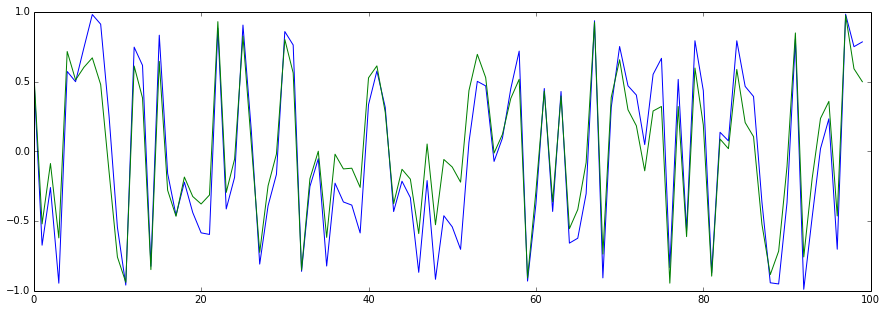

In [7]:
%pylab inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
s = signal[-100:]
r = r0[-100:]
x = range(len(s))

plt.figure(figsize=(15, 5))

plt.plot(x,s)
plt.plot(x,r)
plt.show()

In [14]:
size = 4000
carrier = np.random.uniform(-1, 1, size=size)
signal = np.random.uniform(-1, 1, size=size)
for i in range(size):
    signal[i] = (1.0 * sin(0.001 * i))
encrypted = carrier + signal

Populating the interactive namespace from numpy and matplotlib


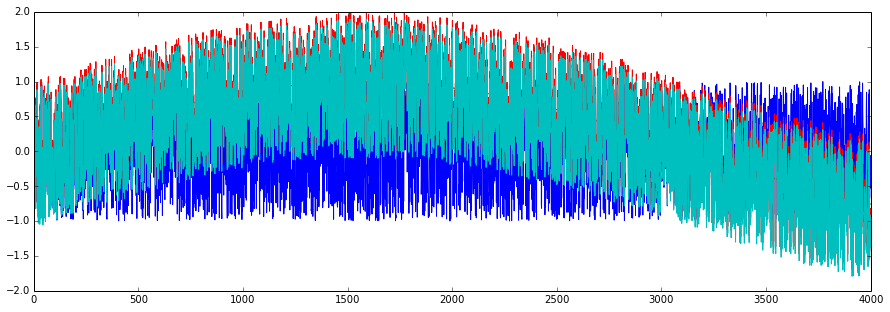

In [32]:
%pylab inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
x = range(len(signal))

r = filter(encrypted, 1.0)
plt.figure(figsize=(15, 5))

plt.plot(x,carrier)
plt.plot(x,signal)
plt.plot(x,encrypted)
plt.plot(x, r)
plt.show()